## In Jupyter, one can easily document and report what they have done and many use it to present their results. 

#### Some useful Jupyter **shortcuts** are: 
##### $\;\;\;\;\;\;$- Ctrl + Enter (run current cell) 
##### $\;\;\;\;\;\;$- Alt+Enter (run the current and make a new cell) 
##### $\;\;\;\;\;\;$- Shift + Enter (run and move to the next cell) 

#### When in the **command mode**: 
##### $\;\;\;\;\;\;$- **Use h to pull up the list of all the shortcuts.** Some of the useful ones are:
##### $\;\;\;\;\;\;$- m (turn the cell into a markdown cell),1 (turn the text into a large header), y (turn it to code cell), k and j are to move up and down, a and b to insert cell above and below 

#### In the **code cells**: 
##### $\;\;\;\;\;\;$- Tab (for code completion)
##### $\;\;\;\;\;\;$- Shift + Tab (for pulling up the help documentation)
##### $\;\;\;\;\;\;$- Ctrl + ]    (indent) 

## The notebook is as follows:
* #### Reading Data into DataFrames
* ####  Inserting, Dropping, and Renaming rows and columns
* ####  Data Cleaning (Handling missing values, and converting data formats)
* ####  Exploratory Data Analysis 
* ####  Data Visualization
* ####  Hypothesis formulation/Conclusion

In [677]:
#Library
import numpy as np 
import pandas as pd 
import seaborn as sns
import datetime
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
py.init_notebook_mode(connected = True)

## Introduction to DataFrames  
### Let's create an empty dataframe first!

In [678]:
col = ['Name','Age']
df = pd.DataFrame(columns = col)
df

,Name,Age


### There are multiple ways to create a DataFrames:

In [679]:
# using list of lists
data = [['John', 29], ['Hannah', 35], ['Juli', 26]]
df = pd.DataFrame(data, columns = ['Name', 'Age'])
df

,Name,Age
0,John,29
1,Hannah,35
2,Juli,26


In [680]:
# using dictionaries
Data = {'Name':['John','Hannah','Juli'],'Age':[29,35,26]}
df = pd.DataFrame(Data)
df

,Name,Age
0,John,29
1,Hannah,35
2,Juli,26


### But, the most common case is to read the data from an Excel or CSV file into the dataframe using **pd.read_csv()**:

# Example dataset: Melbourne House Prices
### Analysing housing data in Melbourne
![](https://cdn.britannica.com/64/190464-050-B74E1FD9/view-central-business-district-Melbourne-train-station.jpg)

In [681]:
df = pd.read_csv('melb_data.csv')
print('Dataset has ',df.shape[0],' records and ',df.shape[1], ' columns' )
print(' ')
df.head() # head shows the first 5 rows by default

Dataset has  13580  records and  21  columns
 


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### Renaming a column

In [682]:
print('Before Rename: ',df.columns)
df = df.rename(columns = {'SellerG':'Real_Estate_Agent'})
# Column names in the dataset
print('After Rename: ',df.columns)

Before Rename:  Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')
After Rename:  Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'Real_Estate_Agent', 'Date', 'Distance', 'Postcode', 'Bedroom2',
       'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount'],
      dtype='object')


### Inserting a new column

In [683]:
# new column
df['test'] = 'test column'
df.head(2)

,Suburb,Address,Rooms,Type,Price,Method,Real_Estate_Agent,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,test
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,test column
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,test column


### Dropping a column

In [684]:
df.drop('test' , axis = 1,inplace = True) # you can set df equal to this statement here to overwrite or use inplace = True
df.head(2)

,Suburb,Address,Rooms,Type,Price,Method,Real_Estate_Agent,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0


### Inserting a new row

In [685]:
new_row = {'Suburb': 'Abbotsford', 'Address': '26 Bloomburg St', 'Rooms': 4, 'Type': 'h', 'Price': 1033030.0, 'Method': 'S', 'Real_Estate_Agent': 'Biggin', 'Date': '4/02/2016', 'Distance': 2.5, 'Postcode': 3067.0, 'Bedroom2': 2.0, 'Bathroom': 1.0, 'Car': 0.0, 'Landsize': 156.0, 'BuildingArea': 79.0, 'YearBuilt': 1900.0, 'CouncilArea': 'Yarra', 'Lattitude': -37.8079, 'Longtitude': 144.9934, 'Regionname': 'Northern Metropolitan', 'Propertycount': 4019.0}
print(len(df))
df = df.append(new_row , ignore_index = True)  # ignore_index should be set to True to append a dict to the dataframe
print(len(df))
df.tail(2)

13580
13581


,Suburb,Address,Rooms,Type,Price,Method,Real_Estate_Agent,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0
13580,Abbotsford,26 Bloomburg St,4,h,1033030.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0


### Dropping a row

In [686]:
df.drop(len(df)-1,inplace = True)
df.tail(2)

,Suburb,Address,Rooms,Type,Price,Method,Real_Estate_Agent,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


### DataFrame Summary

In [687]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Suburb             13580 non-null  object 
 1   Address            13580 non-null  object 
 2   Rooms              13580 non-null  int64  
 3   Type               13580 non-null  object 
 4   Price              13580 non-null  float64
 5   Method             13580 non-null  object 
 6   Real_Estate_Agent  13580 non-null  object 
 7   Date               13580 non-null  object 
 8   Distance           13580 non-null  float64
 9   Postcode           13580 non-null  float64
 10  Bedroom2           13580 non-null  float64
 11  Bathroom           13580 non-null  float64
 12  Car                13518 non-null  float64
 13  Landsize           13580 non-null  float64
 14  BuildingArea       7130 non-null   float64
 15  YearBuilt          8205 non-null   float64
 16  CouncilArea        122

### Descriptive statistics of the DataFrame

In [688]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [689]:
memory_usage0 = df['Type'].memory_usage()  #select a column with square brackets [ ]
memory_usage1 = df.Type.memory_usage() #select a column with .col_name
print('Initial memory usage: ',memory_usage1,memory_usage0)
df.Type.unique() #Unique values in the column

Initial memory usage:  217280 217280


array(['h', 'u', 't'], dtype=object)

In [690]:
# If the number of distinct categories are very few compared to the number of rows, we can save a substantial amount of memory by using category data type

df['Type'] = df['Type'].astype('category')
memory_usage2 = df['Type'].memory_usage()
print('Memory usage after changing to categorical type: ',memory_usage2)
print('Changing to categorical type reduced the used memory by:' ,(1- memory_usage2/memory_usage1)*100,'%')

Memory usage after changing to categorical type:  122352
Changing to categorical type reduced the used memory by: 43.68924889543446 %


In [691]:
print('Initial Type values: ',df.Type.unique())
df.Type.replace({'h':'house','u':'unit','t':'town_house'}, inplace = True)
print('The more representative values: ',df.Type.unique())
print(' ')
df['Type'].value_counts(normalize = True)

Initial Type values:  ['h', 'u', 't']
Categories (3, object): ['h', 'u', 't']
The more representative values:  ['house' 'unit' 'town_house']
 


house         0.695803
unit          0.222165
town_house    0.082032
Name: Type, dtype: float64

### **Data type conversions** _ to categorical

In [692]:
#Categorical Data
df['Suburb'] = df['Suburb'].astype('category')
df['Postcode'] = df['Postcode'].astype('category')
df['Regionname'] = df['Regionname'].astype('category')
df['Real_Estate_Agent'] = df['Real_Estate_Agent'].astype('category')
df['Type'] = df['Type'].astype('category')
df['Method'] = df['Method'].astype('category')

### Handling missing values

In [693]:
# finding the columns with missing data
pd.isnull(df).any(axis = 0) 

Suburb               False
Address              False
Rooms                False
Type                 False
Price                False
Method               False
Real_Estate_Agent    False
Date                 False
Distance             False
Postcode             False
Bedroom2             False
Bathroom             False
Car                   True
Landsize             False
BuildingArea          True
YearBuilt             True
CouncilArea           True
Lattitude            False
Longtitude           False
Regionname           False
Propertycount        False
dtype: bool

In [694]:
df.isnull().sum()

Suburb                  0
Address                 0
Rooms                   0
Type                    0
Price                   0
Method                  0
Real_Estate_Agent       0
Date                    0
Distance                0
Postcode                0
Bedroom2                0
Bathroom                0
Car                    62
Landsize                0
BuildingArea         6450
YearBuilt            5375
CouncilArea          1369
Lattitude               0
Longtitude              0
Regionname              0
Propertycount           0
dtype: int64

In [695]:
df.drop(columns = ['YearBuilt', 'BuildingArea', 'CouncilArea'], inplace = True) #Dropped this column since this data point was poorly sourced

In [696]:
#df = df.fillna(df.mean())  # fill with the mean of the column
# df = df.fillna(df.max())  # fill with the max of the column
df['Car'] = df['Car'].fillna(df['Car'].mean())    # setting missing values to zero
pd.isnull(df).any(axis = 0)


Suburb               False
Address              False
Rooms                False
Type                 False
Price                False
Method               False
Real_Estate_Agent    False
Date                 False
Distance             False
Postcode             False
Bedroom2             False
Bathroom             False
Car                  False
Landsize             False
Lattitude            False
Longtitude           False
Regionname           False
Propertycount        False
dtype: bool

### **Data type conversions** _ to integer

In [697]:
#Integer Data
df['Car'] = df['Car'].astype('int64')
df['Rooms'] = df['Rooms'].astype('int64')
df['Bedroom2'] = df['Bedroom2'].astype('int64')
df['Bathroom'] = df['Bathroom'].astype('int64')
df['Price'] = df['Price'].astype('float64')

### **Data type conversions** _ to date

In [698]:
print(df.Date.dtypes)  # Columns with mixed types are stored with the object dtype.
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].dtypes

object


dtype('<M8[ns]')

In [699]:
#extracting month
df['Month'] = df['Date'].dt.month
df.head()

,Suburb,Address,Rooms,Type,Price,Method,Real_Estate_Agent,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,Month
0,Abbotsford,85 Turner St,2,house,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,2,1,1,202.0,-37.7996,144.9984,Northern Metropolitan,4019.0,3
1,Abbotsford,25 Bloomburg St,2,house,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,2,1,0,156.0,-37.8079,144.9934,Northern Metropolitan,4019.0,4
2,Abbotsford,5 Charles St,3,house,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,3,2,0,134.0,-37.8093,144.9944,Northern Metropolitan,4019.0,4
3,Abbotsford,40 Federation La,3,house,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,3,2,1,94.0,-37.7969,144.9969,Northern Metropolitan,4019.0,4
4,Abbotsford,55a Park St,4,house,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,3,1,2,120.0,-37.8072,144.9941,Northern Metropolitan,4019.0,4


### Sorting records based on a column values

In [700]:
# After sorting, we have to reset the index:
df = df.sort_values('Price',ascending = False).reset_index() # Default is ascending
df

,index,Suburb,Address,Rooms,Type,Price,Method,Real_Estate_Agent,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,Month
0,12094,Mulgrave,35 Bevis St,3,house,9000000.0,PI,Hall,2017-07-29,18.8,3170.0,3,1,1,744.0,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,7
1,7692,Canterbury,49 Mangarra Rd,5,house,8000000.0,VB,Sotheby's,2017-05-13,9.0,3126.0,5,5,4,2079.0,-37.81790,145.06940,Southern Metropolitan,3265.0,5
2,9575,Hawthorn,49 Lisson Gr,4,house,7650000.0,S,Abercromby's,2017-06-17,5.3,3122.0,4,2,4,1690.0,-37.82652,145.03052,Southern Metropolitan,11308.0,6
3,3616,Kew,15 Barry St,6,house,6500000.0,S,Jellis,2016-08-13,5.6,3101.0,6,6,3,1334.0,-37.80290,145.02670,Southern Metropolitan,10331.0,8
4,12557,Middle Park,136 Page St,5,house,6400000.0,S,Marshall,2017-09-09,3.0,3206.0,5,2,1,553.0,-37.84908,144.95753,Southern Metropolitan,2019.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,7940,Hawthorn,17/17 Park St,1,unit,160000.0,VB,HAR,2017-08-04,4.6,3122.0,1,1,0,322.0,-37.81980,145.03730,Southern Metropolitan,11308.0,8
13576,7303,Albion,8/6 Ridley St,1,unit,145000.0,PI,Biggin,2016-05-28,13.9,3020.0,2,1,1,36.0,-37.78330,144.82660,Western Metropolitan,2185.0,5
13577,1927,Coburg,171 Moreland Rd,4,house,145000.0,PI,Jellis,2016-04-06,7.8,3058.0,3,1,1,536.0,-37.75550,144.96580,Northern Metropolitan,11204.0,4
13578,1805,Caulfield,30 Pyne St,4,house,131000.0,PI,Rodney,2017-02-25,8.9,3162.0,4,1,2,499.0,-37.88640,145.02420,Southern Metropolitan,2379.0,2


In [701]:
# The split function, as the name suggests, splits a string at the specified character 
df['road_type'] = df['Address'].str.split(' ').str[-1]
df.road_type.unique()

array(['St', 'Rd', 'Gr', 'Pde', 'Pl', 'Ct', 'Av', 'Cr', 'Tce',
       'Boulevard', 'Strand', 'Esplanade', 'Dr', 'Righi', 'Avenue',
       'Corso', 'Grove', 'Grange', 'La', 'Victoria', 'Cl', 'Parade',
       'Hwy', 'Ridge', 'Athol', 'Woodland', 'Bvd', 'Sq', 'Wy', 'Cove',
       'Cct', 'Grand', 'Outlook', 'East', 'Crescent', 'Crofts', 'Grn',
       'Cir', 'Highway', 'Summit', 'Nook', 'Mews', 'Hts', 'Glade', 'Esp',
       'Gdns', 'Ave', 'Loop', 'Crossway', 'Dell', 'Terrace', 'Eyrie',
       'Fairway', 'Gra', 'S', 'N', 'Qy', 'W', 'Res', 'E'], dtype=object)

In [702]:
# Standardizing the text formats. 
df['Address'].str.upper()
df['Type'] = df['Type'].str.capitalize()

### iloc vs. loc

In [703]:
print("\n -- loc -- \n")
print(df.loc[df['Price'] < 150000, ['Type']])
 
print("\n -- iloc -- \n")
print(df.iloc[(df['Price'] < 150000).values, [4]])


 -- loc -- 

        Type
13576   Unit
13577  House
13578  House
13579   Unit

 -- iloc -- 

        Type
13576   Unit
13577  House
13578  House
13579   Unit


In [704]:
df.iloc[[1]].to_dict('records')

[{'index': 7692,
  'Suburb': 'Canterbury',
  'Address': '49 Mangarra Rd',
  'Rooms': 5,
  'Type': 'House',
  'Price': 8000000.0,
  'Method': 'VB',
  'Real_Estate_Agent': "Sotheby's",
  'Date': Timestamp('2017-05-13 00:00:00'),
  'Distance': 9.0,
  'Postcode': 3126.0,
  'Bedroom2': 5,
  'Bathroom': 5,
  'Car': 4,
  'Landsize': 2079.0,
  'Lattitude': -37.8179,
  'Longtitude': 145.0694,
  'Regionname': 'Southern Metropolitan',
  'Propertycount': 3265.0,
  'Month': 5,
  'road_type': 'Rd'}]

In [705]:
df.loc[df['Type'] == 'House',['Type','Price','Distance','Regionname']]

,Type,Price,Distance,Regionname
0,House,9000000.0,18.8,South-Eastern Metropolitan
1,House,8000000.0,9.0,Southern Metropolitan
2,House,7650000.0,5.3,Southern Metropolitan
3,House,6500000.0,5.6,Southern Metropolitan
4,House,6400000.0,3.0,Southern Metropolitan
...,...,...,...,...
13511,House,270000.0,13.0,Northern Metropolitan
13532,House,260000.0,11.2,Northern Metropolitan
13541,House,250000.0,4.4,Northern Metropolitan
13577,House,145000.0,7.8,Northern Metropolitan


In [706]:
df_filtered = df.loc[(df['Type'] == 'House') & (df['Distance'] <= 0.5 * np.median(df['Distance'])) & (df['Rooms'] <= 2),['Type','Price','Distance','Regionname','Rooms']]
df_filtered

,Type,Price,Distance,Regionname,Rooms
32,House,4525000.0,1.5,Northern Metropolitan,2
154,House,3260000.0,4.6,Southern Metropolitan,2
248,House,2920000.0,4.6,Southern Metropolitan,2
257,House,2905000.0,3.0,Southern Metropolitan,2
298,House,2810000.0,3.3,Southern Metropolitan,2
...,...,...,...,...,...
12888,House,407500.0,1.9,Southern Metropolitan,1
13415,House,307000.0,2.6,Northern Metropolitan,1
13432,House,300000.0,4.6,Southern Metropolitan,1
13510,House,270000.0,2.6,Northern Metropolitan,2


In [707]:
print('The mean Price of a property meeting our criteria is: ',"${:,.2f}".format(np.mean(df_filtered['Price'])))

The mean Price of a property meeting our criteria is:  $1,174,566.46


# Exploratory Data Analysis & Visualization

## **Groupby**
#### Groupby is a versatile and extremely useful function for exploratory data analysis

Text(0, 0.5, 'Number of records')

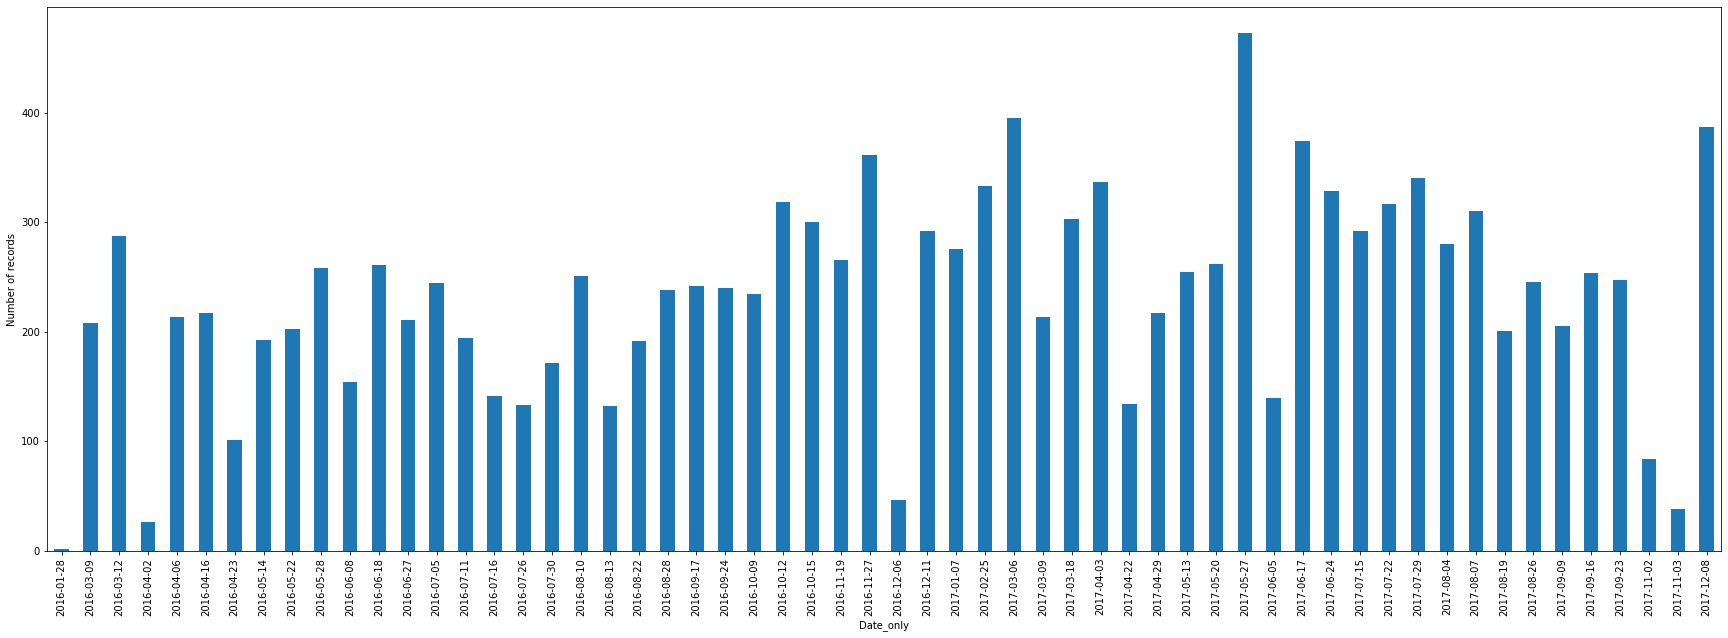

In [708]:
# distribution of the available data over collected dates  
df['Date_only']=df['Date'].dt.date
ax = df.groupby(['Date_only'])['Price'].count().plot(kind = 'bar', figsize = (30,10))
ax.set_ylabel("Number of records")

#### We can see the irregularity in the number of data points for the recorded dates. 

Text(0, 0.5, 'Price')

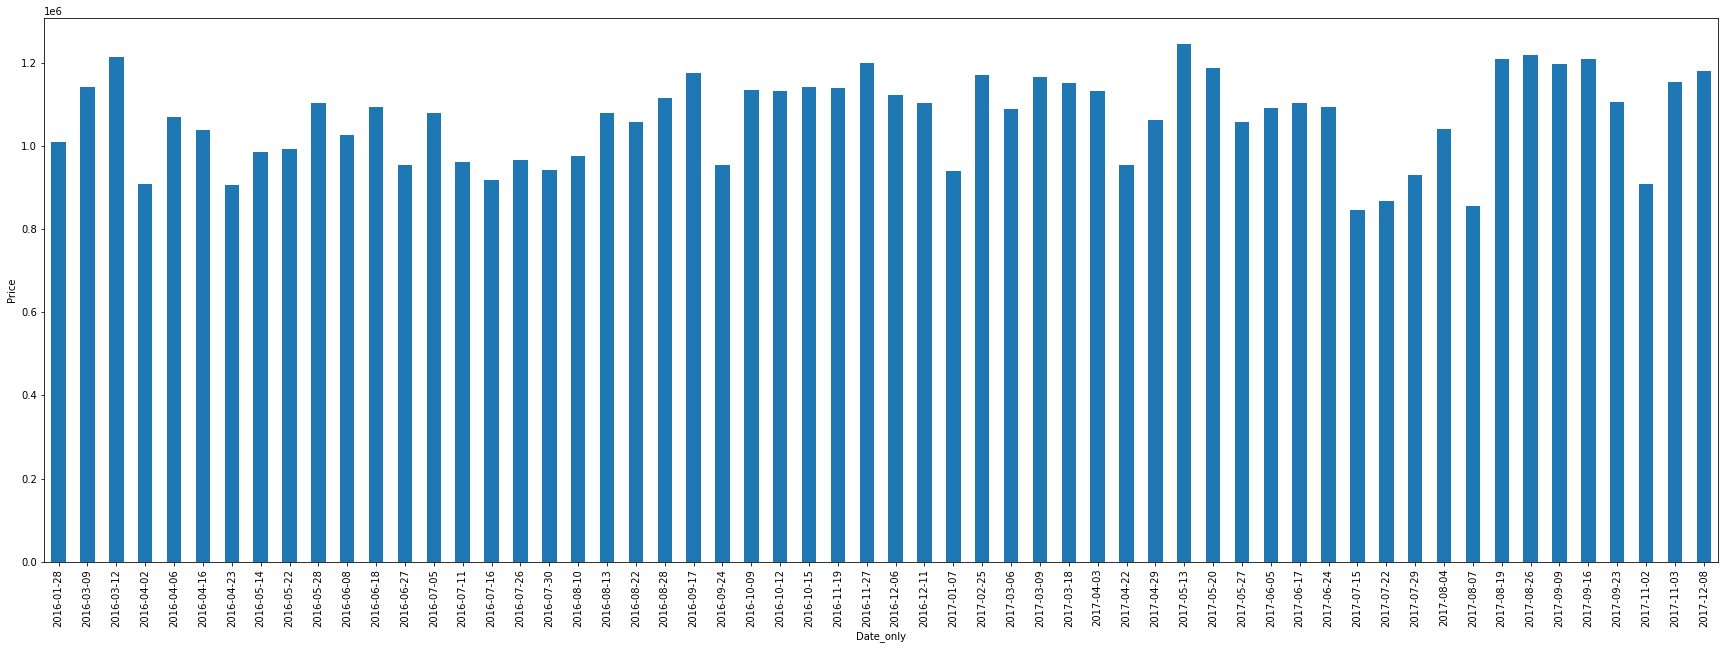

In [709]:
# Mean price on each of the collected dates 
ax = df.groupby(['Date_only'])['Price'].mean().plot(kind = 'bar', figsize = (30,10))
ax.set_ylabel("Price")

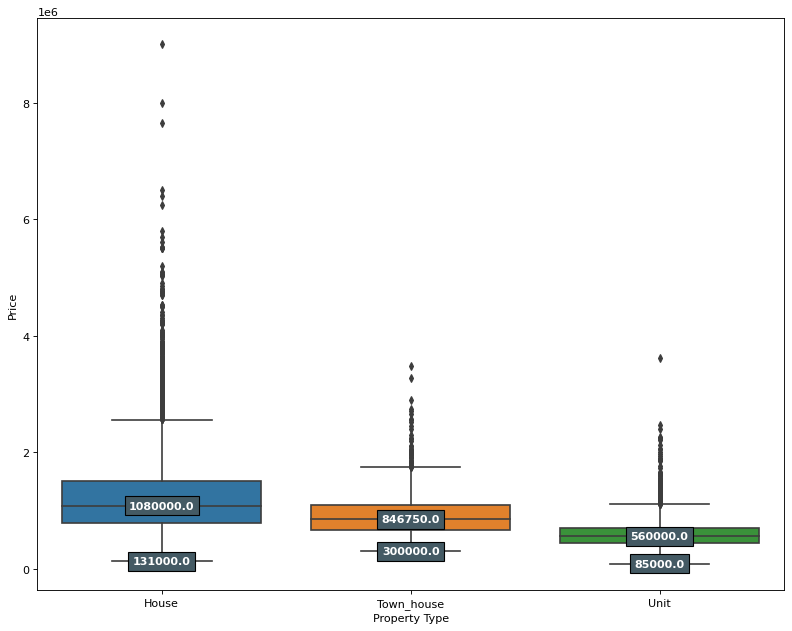

In [710]:
# Visualization
plt.figure(figsize=(10, 8), dpi=80)
box_plot = sns.boxplot(x = 'Type',y = 'Price',data = df.sort_values('Type'))
plt.ylabel('Price')
plt.xlabel('Property Type')

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[cat*6+2].get_ydata()[0],1) 
    y2 = round(lines[cat*6+4].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))
    ax.text(
        cat, 
        y2, 
        f'{y2}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

fig = box_plot.get_figure()

# fig.savefig("age.png",dpi=300)

#### There are a few outliers after the max value and the minium price of all is \\$85,000. 
#### \\$85,000 for a property is very low for Melbourne. Let's find this cheapest property: 

In [711]:
max_price = np.max(df['Price'])
min_price = np.min(df['Price'])
mid_price = np.median(df['Price'])

df[df['Price'].isin([min_price,mid_price,max_price])].sort_values(by = ['Price'])

,index,Suburb,Address,Rooms,Type,Price,Method,Real_Estate_Agent,Date,Distance,...,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount,Month,road_type,Date_only
13579,2652,Footscray,202/51 Gordon St,1,Unit,85000.0,PI,Burnham,2016-03-09,6.4,...,1,0,0.0,-37.79110,144.89000,Western Metropolitan,7570.0,3,St,2016-03-09
6787,1958,Coburg,53 Hawthorn St,2,House,903000.0,S,Nelson,2016-10-15,7.8,...,1,1,253.0,-37.74840,144.95210,Northern Metropolitan,11204.0,10,St,2016-10-15
6788,1502,Bulleen,28 Flinders St,2,House,903000.0,S,Barry,2016-07-26,11.8,...,1,1,591.0,-37.76790,145.09780,Eastern Metropolitan,4480.0,7,St,2016-07-26
6789,6238,Templestowe Lower,208 Templestowe Rd,4,House,903000.0,S,Barry,2016-06-27,13.8,...,1,2,618.0,-37.75640,145.10430,Eastern Metropolitan,5420.0,6,Rd,2016-06-27
6790,1242,Brighton East,2/33 Cluden St,2,Unit,903000.0,S,Hodges,2016-11-27,10.7,...,1,1,171.0,-37.91250,145.01140,Southern Metropolitan,6938.0,11,St,2016-11-27
6791,8640,Kensington,33 Chelmsford St,2,House,903000.0,S,Rendina,2017-04-22,4.2,...,1,0,184.0,-37.79640,144.93390,Northern Metropolitan,5263.0,4,St,2017-04-22
0,12094,Mulgrave,35 Bevis St,3,House,9000000.0,PI,Hall,2017-07-29,18.8,...,1,1,744.0,-37.93168,145.16126,South-Eastern Metropolitan,7113.0,7,St,2017-07-29


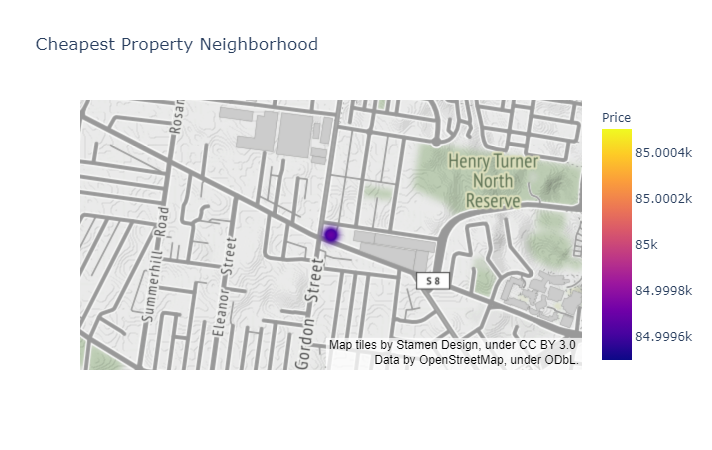

In [712]:
min_Lattitude = df[df['Price'] == min_price]['Lattitude'].values[0]
min_Longtitude = df[df['Price'] == min_price]['Longtitude'].values[0]

import plotly.express as px
fig = px.density_mapbox(df[df['Price'] == min_price], lat='Lattitude', lon='Longtitude', z='Price', radius=15,
                        center=dict(lat=min_Lattitude, lon=min_Longtitude), zoom=14,
                        mapbox_style="stamen-terrain", opacity = 1, title = 'Cheapest Property Neighborhood')
fig.show()

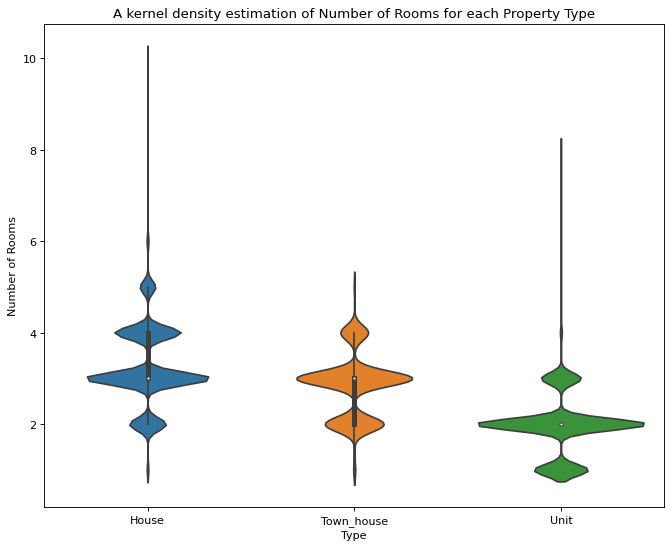

In [713]:
plt.figure(figsize=(10, 8), dpi=80)
sns_plot = sns.violinplot(x = 'Type',y = 'Rooms',data = df.sort_values('Type'), split = False)
plt.ylabel('Number of Rooms')
plt.xlabel('Type')
plt.title('A kernel density estimation of Number of Rooms for each Property Type')
fig = sns_plot.get_figure()
# fig.savefig("mas.png",dpi=300)

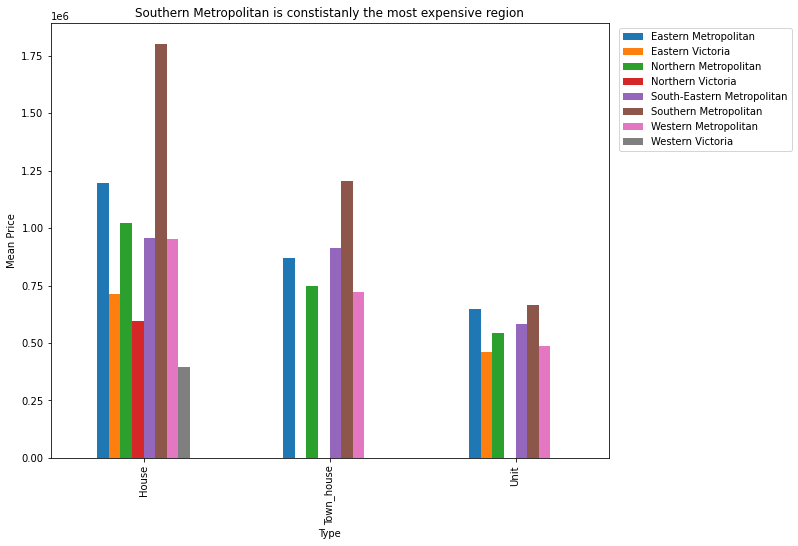

In [714]:
# we can use pivot table and then plot it to compare the price of 
# properties in different regions grouped by their type

df.pivot_table(index='Type', values='Price', aggfunc='mean',columns='Regionname')\
.plot(kind="bar",figsize=(10, 8))
plt.ylabel('Mean Price')
plt.title('Southern Metropolitan is constistanly the most expensive region')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

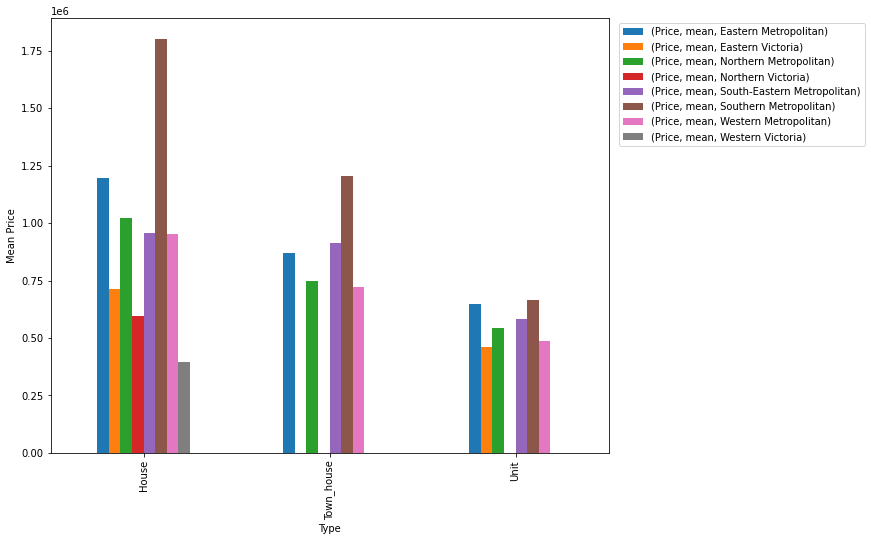

In [715]:
# another approach is using groupby:
df[['Price','Type','Regionname']]\
.groupby(['Type','Regionname']) .agg(['mean']).sort_values(by=("Price", "mean"))\
.dropna().unstack().plot(kind='bar',figsize=(10, 8))
plt.ylabel('Mean Price')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

#### Bedroom2 (Scraped # of Bedrooms (from different source)) is not consistent with the other source:


In [716]:
df[['Type','Rooms','Bedroom2']].groupby('Type') .agg(['max','min','mean']).round(1)

Rooms          Bedroom2         
             max min mean      max min mean
Type                                       
House         10   1  3.3       20   0  3.2
Town_house     5   1  2.8        5   0  2.8
Unit           8   1  2.0        5   0  2.0

#### We can use **px.density_mapbox**, and  **Lattitude** and **Longtitude** columns in the data, to overlay the data points on map.

#### Each row of the DataFrame is represented as a point smoothed with a given radius of influence.

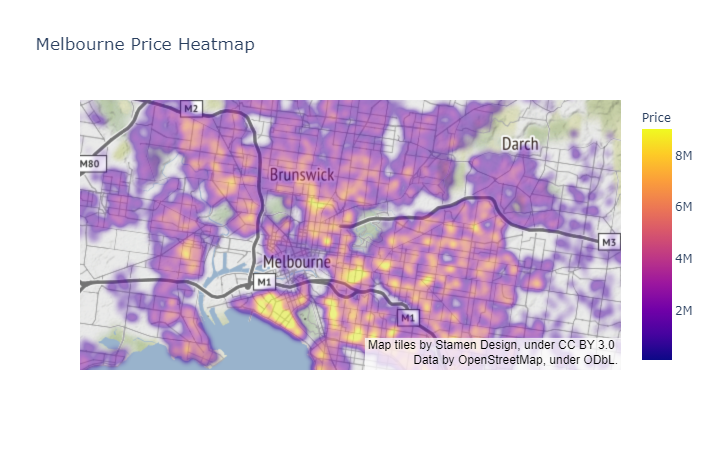

In [717]:
import plotly.express as px
fig = px.density_mapbox(df, lat='Lattitude', lon='Longtitude', z='Price', radius=10,
                        center=dict(lat=-37.8, lon=145), zoom=10,
                        mapbox_style="stamen-terrain", opacity = 0.5, title = 'Melbourne Price Heatmap')
fig.show()

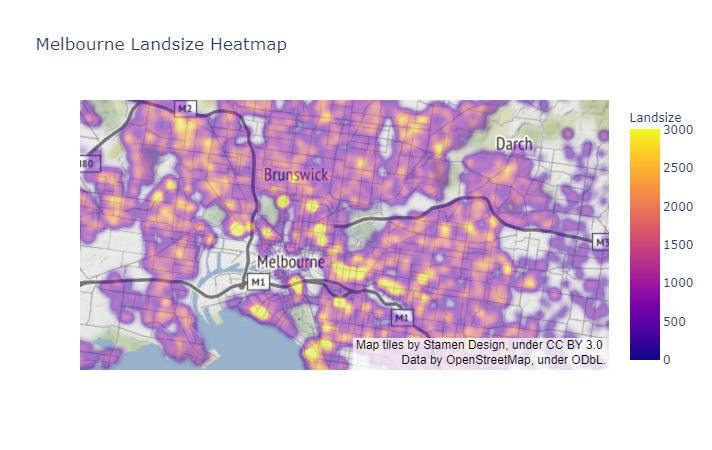

In [718]:
import plotly.express as px
fig = px.density_mapbox(df, lat='Lattitude', lon='Longtitude', z='Landsize', radius=10,
                        center=dict(lat=-37.8, lon=145), zoom=10,
                        mapbox_style="stamen-terrain", opacity = 0.5, title = 'Melbourne Landsize Heatmap',range_color=(0,3000))
fig.show()

In [719]:
monthDict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
            7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
df.pivot_table(index='Type',columns='Month', values=['Price', 'Propertycount'], aggfunc={'Price':'count'}).rename(columns=monthDict, level=1)

Price                                                           
Month        Jan  Feb  Mar  Apr   May   Jun   Jul   Aug  Sep  Oct  Nov  Dec
Type                                                                       
House        198  232  987  796  1108  1026  1219  1332  955  577  496  523
Town_house    24   26  117  101   156   120   155   140   86   68   66   55
Unit          56   75  304  349   380   323   461   378  147  209  188  147

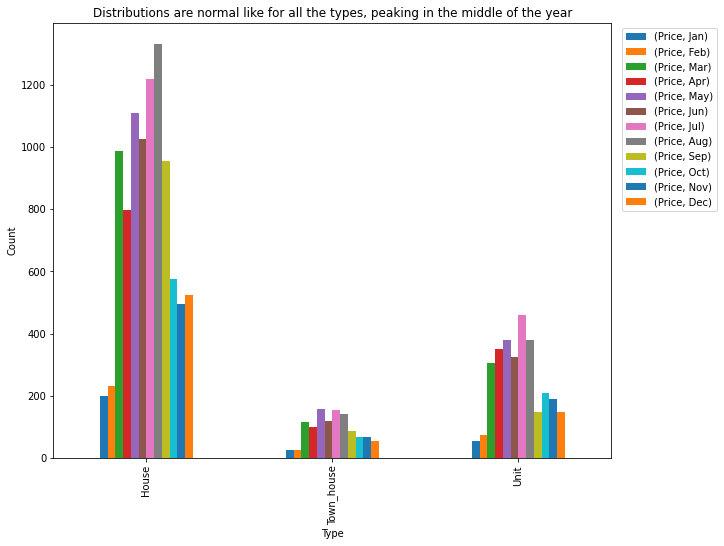

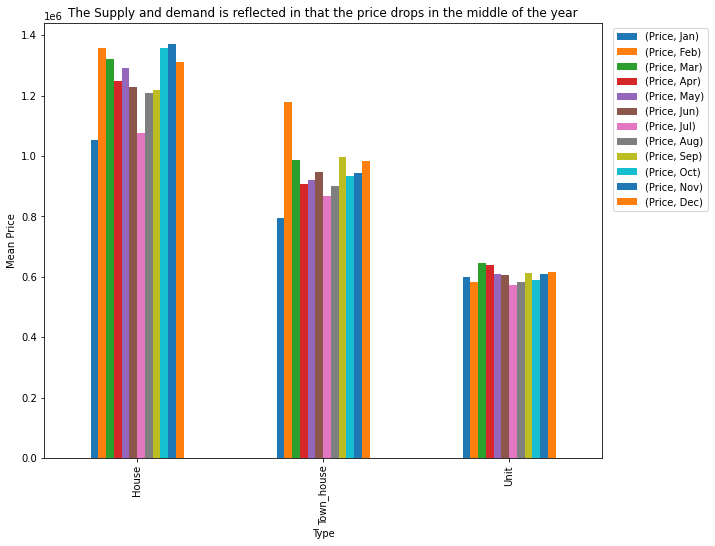

In [720]:
import calendar
df['Month2'] = df['Month'].apply(lambda x: calendar.month_abbr[x])


df.pivot_table(index='Type',columns='Month', values=['Price', 'Propertycount'], aggfunc={'Price':'count'})\
.rename(columns=monthDict, level=1).plot(kind="bar",figsize=(10, 8))
plt.ylabel('Count')
plt.title('Distributions are normal like for all the types, peaking in the middle of the year')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')


df.pivot_table(index='Type',columns='Month', values=['Price', 'Propertycount'], aggfunc={'Price':'mean'})\
.rename(columns=monthDict, level=1).plot(kind="bar",figsize=(10, 8))
plt.ylabel('Mean Price')
plt.title('The Supply and demand is reflected in that the price drops in the middle of the year')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

### Correlation of Price with other features

#### Correlation matrix can only be used for numberical variables. 

#### Here are some common sense assumptions:
1. **Landsize and Price are probably highly correlated.** I believe that in Melbourne as land size increases the house prices will increase linearly to that. 
2. **Rooms, Bathroom and Carpark should be highly correlated.** Same logic as point 1, the bigger the house the higher the price.
3. **In Australia the CBD(Central Business District) tends to be prime property.** The reason for that is every aminety is readily avialable and being close to work is a huge advantage consdering all work offices tend to be within the CBD.
4. Certain Real Estate agents will be "expert sellers" in certain locations within Melbourne. The rationale behind this one is simple, a real estate agent might pick niche which makes them the specialist in selling houses in a given area. 


In [721]:
#Numerical Dataset
df_numerical = pd.concat([df['Price'], df['Distance'], df['Rooms'], df['Bathroom'], df['Car'], df['Landsize']], axis = 1)
df_numerical = df[['Price','Distance','Rooms','Bathroom','Car','Landsize']]
#df_numerical = df.select_dtypes(include='number')
df_numerical

,Price,Distance,Rooms,Bathroom,Car,Landsize
0,9000000.0,18.8,3,1,1,744.0
1,8000000.0,9.0,5,5,4,2079.0
2,7650000.0,5.3,4,2,4,1690.0
3,6500000.0,5.6,6,6,3,1334.0
4,6400000.0,3.0,5,2,1,553.0
...,...,...,...,...,...,...
13575,160000.0,4.6,1,1,0,322.0
13576,145000.0,13.9,1,1,1,36.0
13577,145000.0,7.8,4,1,1,536.0
13578,131000.0,8.9,4,1,2,499.0


<AxesSubplot:>

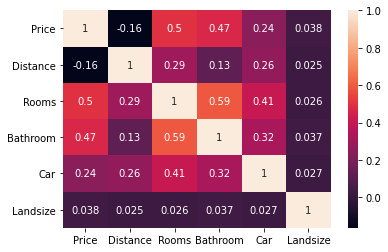

In [722]:
sns.heatmap(df_numerical.corr(), annot = True)

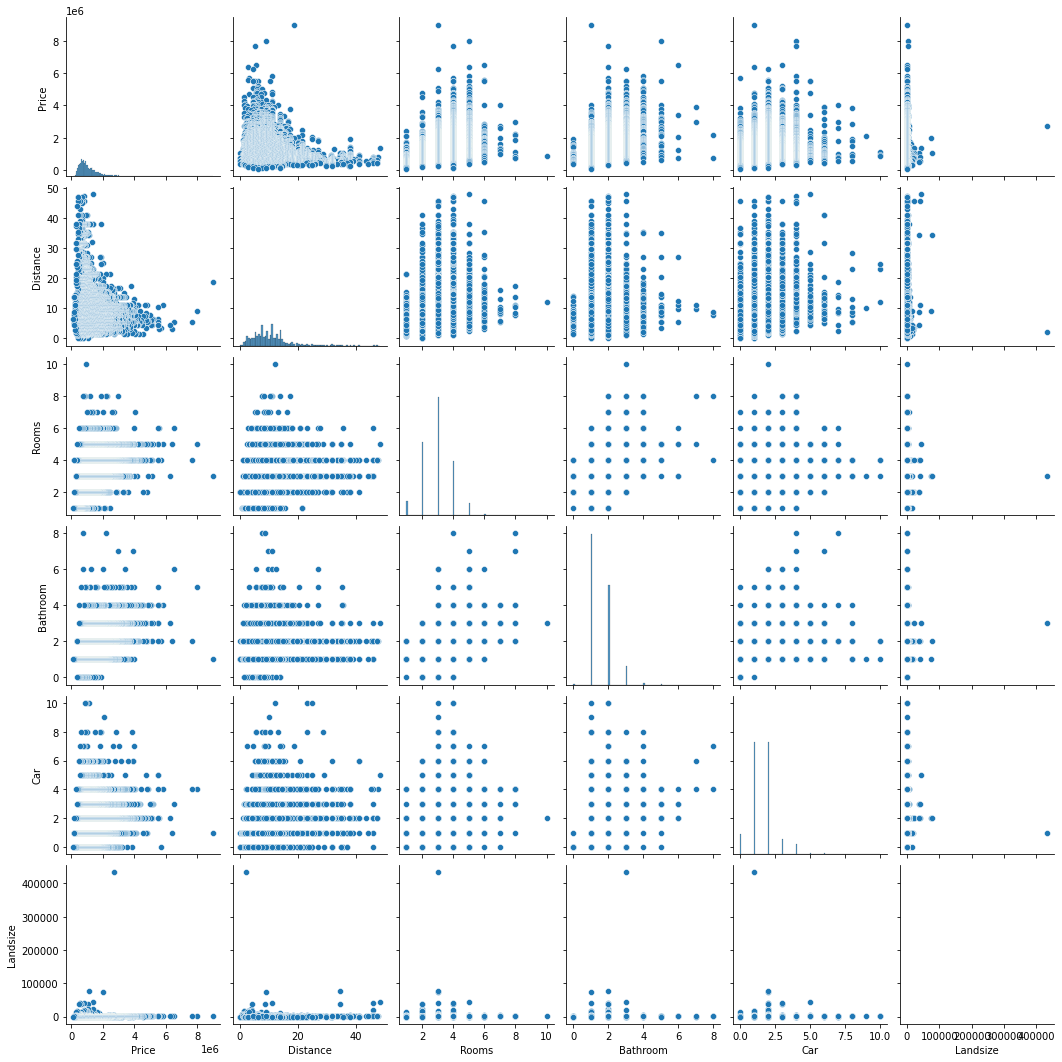

In [723]:
sns.pairplot(df_numerical)

Orighty, this pairplot has lot going on so lets take it step-by-step. Firstly, Landsize data has an outlier sticking out. We can get rid of the outlier which will give us some more meaningful insights (will do this in a bit).

Now lets look at Distance. The Distance variable is exhibiting a sort of positively skewed bell curve characteristics when plotted against Price. It seems that as distance reduces prices increase not strictly linearly, this maybe why the correlation matrix was showing strange values. But from the pairplot we can observe the 4th assumption in full effect which is awesome! There are obvious relationships with distance such as distance increases (moving out of CBD) Rooms, Bathrooms and Car space will increase. I do not want to spend too much time on this at the moment.

Finally, looking at Rooms, Bathrooms and Car we can observe a loosely positive increase in price as there is a positive 1-unit change in the three variables. Once again this does not indicate that there is a strict linear relationship, we have to always take this kind of analysis with a grain of salt.


In [724]:
#Removing the outlier from Landsize var, I am going to remove the row exhibiting the Landsize outlier completely
df_numerical_2 = df_numerical.drop(df_numerical['Landsize'].idxmax())

In [725]:
df_numerical_2 = df_numerical.drop(df_numerical.index[df_numerical['Landsize'] > 10000])
#df.loc[df['B'] == 19]


<AxesSubplot:ylabel='Landsize'>

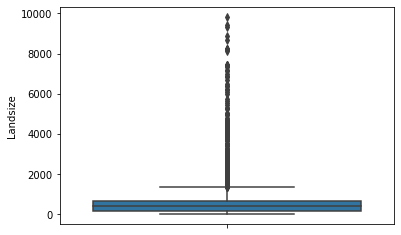

In [726]:
 sns.boxplot(y = df_numerical_2.Landsize, data = df_numerical_2)

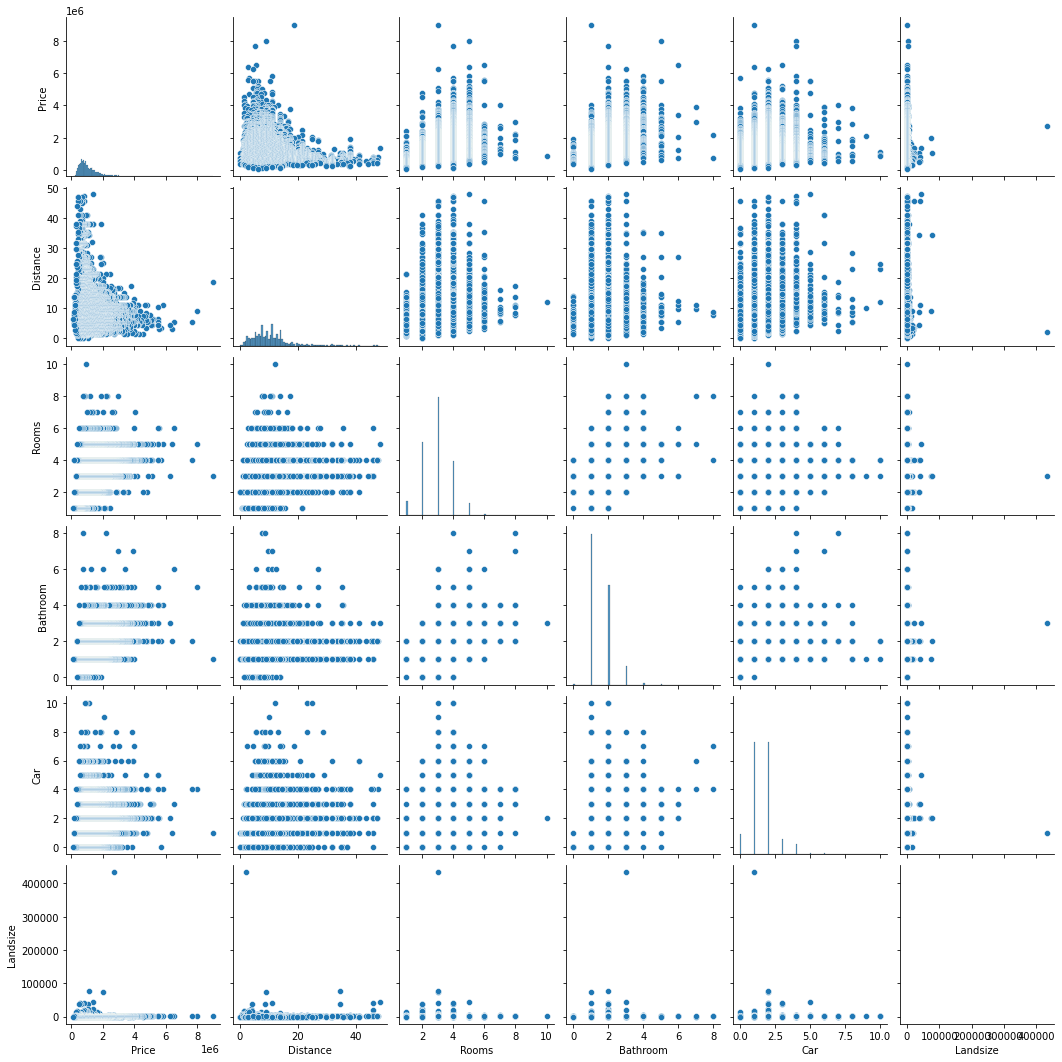

In [727]:
sns.pairplot(df_numerical)

![](https://i.pinimg.com/originals/91/db/a8/91dba80a5419f1bf4700ec99ab6081bb.jpg)